<a href="https://colab.research.google.com/github/9mithun9/Telco-Customer-Churn-Prediction-Model/blob/main/Telco_Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opendatasets

In [4]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mehedferewrfs
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 287MB/s]

In [7]:
data_dir = 'telco-customer-churn'

In [8]:
import pandas as pd
import os

In [42]:
df = pd.read_csv(os.path.join(data_dir,'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

In [43]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
75,2673-CXQEU,Female,1,No,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,110.50,6139.5,No
1407,0895-UADGO,Male,0,No,Yes,8,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,Two year,Yes,Mailed check,44.55,343.45,No
2807,1015-JPFYW,Male,0,No,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.45,136.75,No
4547,5339-TJFEK,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,6487.2,No
6652,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689,No


In [60]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column}: {df[column].unique()}')

In [69]:
print_unique_col_values(df)

In [64]:
df.drop('customerID', axis=1, inplace=True)

In [44]:
df.replace('No phone service', 'No', inplace=True)
df.replace('No internet service', 'No', inplace=True)

In [54]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn', 'SeniorCitizen']


In [56]:
for col in binary_cols:
  df[col] = df[col].replace({'Yes': 1, 'No': 0})

In [62]:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})

In [66]:
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']

In [67]:
df = pd.get_dummies(df, columns=cat_cols)

In [68]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5088,0,0,1,1,57,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
5687,1,0,0,0,43,1,0,1,1,1,...,False,True,False,False,True,False,False,True,False,False
2542,1,0,0,1,35,1,0,0,0,0,...,True,False,False,False,True,False,False,False,False,True
1783,1,0,0,1,1,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6075,0,0,0,0,10,1,0,0,1,0,...,True,False,False,False,True,False,False,False,False,True


In [74]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [72]:
df[num_cols].sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
798,0,1,20.00,20.00
4835,0,65,104.25,6812.95
1539,0,4,50.30,217.10
6101,1,69,110.25,7467.55
505,1,20,94.10,1782.40


In [75]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [33]:
# prompt: find the relation between gender and churn

import plotly.express as px

fig = px.histogram(df, x='TotalCharges', color='Churn')
fig.update_layout(title='Churn Rate by Gender')
fig.show()

In [19]:
df[['gender','Partner','Churn','Dependents','PaperlessBilling','PhoneService','tenure','MonthlyCharges']].corr()

,gender,Partner,Churn,Dependents,PaperlessBilling,PhoneService,tenure,MonthlyCharges
gender,1.000000,-0.001808,-0.008612,0.010517,-0.011754,-0.006488,0.005106,-0.014569
Partner,-0.001808,1.000000,-0.150448,0.452676,-0.014877,0.017706,0.379697,0.096848
Churn,-0.008612,-0.150448,1.000000,-0.164221,0.191825,0.011942,-0.352229,0.193356
Dependents,0.010517,0.452676,-0.164221,1.000000,-0.111377,-0.001762,0.159712,-0.113890
PaperlessBilling,-0.011754,-0.014877,0.191825,-0.111377,1.000000,0.016505,0.006152,0.352150
PhoneService,-0.006488,0.017706,0.011942,-0.001762,0.016505,1.000000,0.008448,0.247398
tenure,0.005106,0.379697,-0.352229,0.159712,0.006152,0.008448,1.000000,0.247900
MonthlyCharges,-0.014569,0.096848,0.193356,-0.113890,0.352150,0.247398,0.247900,1.000000


In [47]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [48]:
print(df['TotalCharges'].isnull().sum())

11


In [49]:
pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [23]:
len(df)

7043

In [50]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [25]:
df.iloc[753]

,753
customerID,3115-CZMZD
gender,1
SeniorCitizen,0
Partner,0
Dependents,1
tenure,0
PhoneService,1
MultipleLines,No
InternetService,No
OnlineSecurity,No internet service


In [51]:
# prompt: drop all the rows where Totalcharges is NaN

df.dropna(subset=['TotalCharges'], inplace=True)
len(df)

7032

In [27]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [28]:
len(df)

7032

In [52]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [77]:
df[['TotalCharges','Churn']].corr()

,TotalCharges,Churn
TotalCharges,1.000000,-0.199484
Churn,-0.199484,1.000000


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [79]:
df[num_cols].sample(5)

,tenure,MonthlyCharges,TotalCharges
3501,0.816901,0.579104,0.519351
1468,0.859155,0.736816,0.659203
893,0.000000,0.063184,0.000669
1950,0.901408,0.732338,0.683366
4301,0.915493,0.014925,0.152977


In [80]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [81]:
input_cols = df.columns.tolist()
input_cols.remove('Churn')
target_col = 'Churn'

In [84]:
from sklearn.model_selection import train_test_split

x = df[input_cols]
y = df[target_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
x_test.shape

(1407, 26)

In [89]:
import tensorflow as tf
from tensorflow import keras

In [92]:
model = keras.Sequential([
    keras.layers.Dense(16, input_shape=(x_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7313 - loss: 0.5764
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7595 - loss: 0.4514
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7955 - loss: 0.4260
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8020 - loss: 0.4248
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8000 - loss: 0.4143
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.4153
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8065 - loss: 0.4130
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8078 - loss: 0.4114
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8070 - loss: 0.3984
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8082 - loss: 0.4126
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.3975
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [93]:
model.evaluate(x_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4546


[0.4605185389518738, 0.7839374542236328]

In [94]:
y_predict = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [96]:
y_test

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0
...,...
1733,0
5250,0
5465,0
5851,0


In [95]:
y_predict

array([[0.0067995 ],
       [0.10292704],
       [0.76221895],
       ...,
       [0.06029632],
       [0.14659281],
       [0.00343781]], dtype=float32)

In [97]:
y_predict = (y_predict > 0.5).astype(int).flatten()

In [99]:
y_predict[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [100]:
y_test[:10]

,Churn
2481,0
6784,0
6125,1
3052,0
4099,0
3223,0
3774,0
3469,0
3420,0
1196,0


In [101]:
# prompt: in df[target_col] how many true and how many false

print(df[target_col].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In [103]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



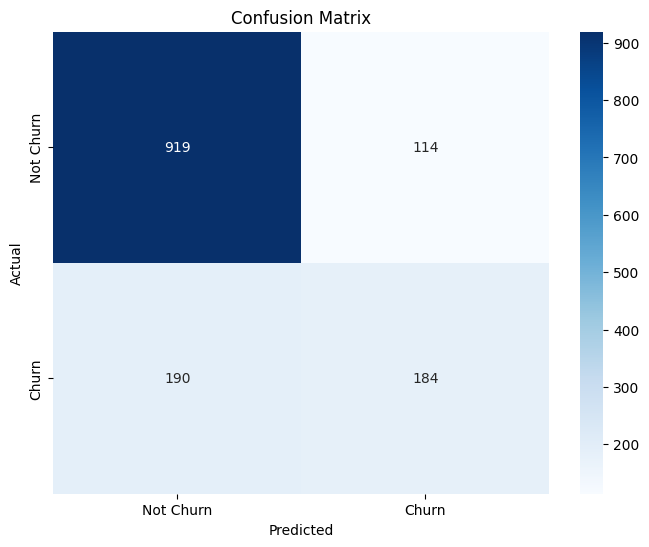

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()